In [9]:
import csv
import numpy
from matplotlib import pyplot
from typing import Dict
import matplotlib
pyplot.rcParams['font.family'] = 'IPAGothic'
    
csv_data = [row for row in csv.reader(open('./sample.csv'))]

keys = csv_data[0][1:]
csv_data = csv_data[1:]
print(keys)


['打率', '本塁打', '打点', '盗塁', '四球']


In [10]:
dict_data: dict = {}
for row in csv_data:
    name = row[0]
    datas = row[1:]
    dict_data[name] = {'value': {}, 'order': {}}
    for (k, d) in zip(keys, datas):
        try:
            dict_data[name]['value'][k] = int(d)
        except:
            try:
                dict_data[name]['value'][k] = float(d)
            except:
                pass
for data in dict_data.values():
    print(data)

{'value': {'打率': 0.27, '本塁打': 12, '打点': 80, '盗塁': 10, '四球': 40}, 'order': {}}
{'value': {'打率': 0.28, '本塁打': 35, '打点': 90, '盗塁': 8, '四球': 30}, 'order': {}}
{'value': {'打率': 0.3, '本塁打': 10, '打点': 40, '盗塁': 20, '四球': 30}, 'order': {}}
{'value': {'打率': 0.26, '本塁打': 8, '打点': 50, '盗塁': 30, '四球': 50}, 'order': {}}


In [11]:
for key in keys:
    order_list: list[Dict[str, str|int|float]] = []
    for name, data in dict_data.items():
        order_list.append({'name': name, 'value': data['value'][key]})
    order_list.sort(key=lambda x: x['value'], reverse=True)
    # rint(order_list)

    for i, value in enumerate(order_list):
        dict_data[value['name']]['order'][key] = i
for data in dict_data.values():
    print(data)

{'value': {'打率': 0.27, '本塁打': 12, '打点': 80, '盗塁': 10, '四球': 40}, 'order': {'打率': 2, '本塁打': 1, '打点': 1, '盗塁': 2, '四球': 1}}
{'value': {'打率': 0.28, '本塁打': 35, '打点': 90, '盗塁': 8, '四球': 30}, 'order': {'打率': 1, '本塁打': 0, '打点': 0, '盗塁': 3, '四球': 2}}
{'value': {'打率': 0.3, '本塁打': 10, '打点': 40, '盗塁': 20, '四球': 30}, 'order': {'打率': 0, '本塁打': 2, '打点': 3, '盗塁': 1, '四球': 3}}
{'value': {'打率': 0.26, '本塁打': 8, '打点': 50, '盗塁': 30, '四球': 50}, 'order': {'打率': 3, '本塁打': 3, '打点': 2, '盗塁': 0, '四球': 0}}


In [12]:
normalizing_dict: Dict[str, Dict[str, float]] = {}

for key in keys:
    normalizing_dict[key] = {}
    tmp_list: list[float] = [data['value'][key] for data in dict_data.values()]
    normalizing_dict[key]['offset'] = min(tmp_list)
    normalizing_dict[key]['range'] = max(tmp_list) - min(tmp_list)

print(normalizing_dict)

{'打率': {'offset': 0.26, 'range': 0.03999999999999998}, '本塁打': {'offset': 8, 'range': 27}, '打点': {'offset': 40, 'range': 50}, '盗塁': {'offset': 8, 'range': 22}, '四球': {'offset': 30, 'range': 20}}


In [13]:
tmp_dict = {}
for key in keys:
    value_list: list[int|float] = [value['value'][key] for value in dict_data.values()]
    tmp_dict[key] = sum(value_list) / len(value_list)
dict_data['平均'] = {}
dict_data['平均']['value'] = tmp_dict

for value in dict_data.values():
    print(value)

{'value': {'打率': 0.27, '本塁打': 12, '打点': 80, '盗塁': 10, '四球': 40}, 'order': {'打率': 2, '本塁打': 1, '打点': 1, '盗塁': 2, '四球': 1}}
{'value': {'打率': 0.28, '本塁打': 35, '打点': 90, '盗塁': 8, '四球': 30}, 'order': {'打率': 1, '本塁打': 0, '打点': 0, '盗塁': 3, '四球': 2}}
{'value': {'打率': 0.3, '本塁打': 10, '打点': 40, '盗塁': 20, '四球': 30}, 'order': {'打率': 0, '本塁打': 2, '打点': 3, '盗塁': 1, '四球': 3}}
{'value': {'打率': 0.26, '本塁打': 8, '打点': 50, '盗塁': 30, '四球': 50}, 'order': {'打率': 3, '本塁打': 3, '打点': 2, '盗塁': 0, '四球': 0}}
{'value': {'打率': 0.2775, '本塁打': 16.25, '打点': 65.0, '盗塁': 17.0, '四球': 37.5}}


In [14]:
print([k for k in dict_data.keys()])

['ゆかり', 'マキ', 'きりたん', 'ずんこ', '平均']


In [17]:
name = 'マキ'

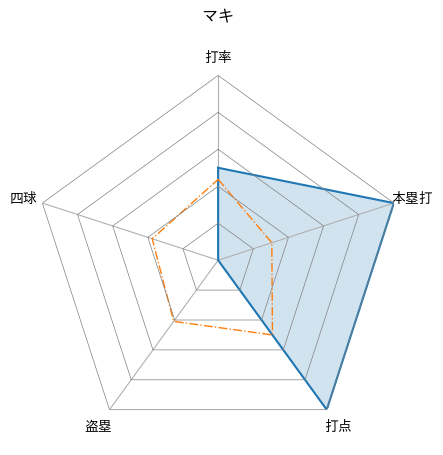

In [18]:
dict: dict = dict_data[name]['value']

values = \
    [((value - normalizer['offset']) / normalizer['range'])
     for value, normalizer
     in zip(dict.values(), normalizing_dict.values())]
average = \
    [((value - normalizer['offset']) / normalizer['range'])
     for value, normalizer
     in zip(dict_data['平均']['value'].values(), normalizing_dict.values())]
# print(values)

labels = [k for k in dict.keys()]

# 多角形を閉じるためにデータの最後に最初の値を追加する。
radar_values = numpy.concatenate([values, [values[0]]])
radar_average = numpy.concatenate([average, [average[0]]])
# プロットする角度を生成する。
angles = numpy.linspace(0, 2 * numpy.pi, len(labels) + 1, endpoint=True)
# メモリ軸の生成
rgrids = [0, 0.2, 0.4, 0.6, 0.8, 1.0]


fig = pyplot.figure(facecolor="w")
# 極座標でaxを作成
ax = fig.add_subplot(1, 1, 1, polar=True)
# レーダーチャートの線を引く
ax.plot(angles, radar_values)
ax.plot(angles, radar_average, linestyle="dashdot", linewidth=1)
#　レーダーチャートの内側を塗りつぶす
ax.fill(angles, radar_values, alpha=0.2)
# 項目ラベルの表示
ax.set_thetagrids(angles[:-1] * 180 / numpy.pi, labels)
# 円形の目盛線を消す
ax.set_rgrids([])
# 一番外側の円を消す
ax.spines['polar'].set_visible(False)
# 始点を上(北)に変更
ax.set_theta_zero_location("N")
# 時計回りに変更(デフォルトの逆回り)
ax.set_theta_direction(-1)

# 多角形の目盛線を引く
for grid_value in rgrids:
    grid_values = [grid_value] * (len(labels)+1)
    ax.plot(angles, grid_values, color="gray",  linewidth=0.5)

# # メモリの値を表示する
# for t in rgrids:
#     # xが偏角、yが絶対値でテキストの表示場所が指定される
#     ax.text(x=0, y=t, s=t)

# rの範囲を指定
ax.set_rlim([min(rgrids), max(rgrids)])

ax.set_title(name, pad=20)
pyplot.show()